In [ ]:
import numpy as np

# Plot_vectors

Для визуализации векторов для вас написана специальная функция `plot_vectors()`,  которая получает Двумерный np.ndarray каждая строка которого является вектором в плоском или трехмерном пространстве. Даже если вы хотите построить один вектор, вы должны его представить в виде двумерного массива.

In [ ]:
import plotly.graph_objects as go

def plot_vectors(vectors: np.ndarray, color='red'):
    fig = go.Figure()
    origin = [0, 0, 0]
    if vectors.shape[1] == 2:
      vectors = np.concatenate([vectors, np.zeros((vectors.shape[0], 1))], axis=1)
    vectors = vectors.tolist()
    for vector in vectors:
        fig.add_trace(go.Scatter3d(x=[origin[0], vector[0]],
                                    y=[origin[1], vector[1]],
                                    z=[origin[2], vector[2]],
                                    mode='lines',
                                    line=dict(color=color, width=5)))
        fig.add_trace(go.Cone(x=[vector[0]], y=[vector[1]], z=[vector[2]],
                              u=[vector[0]], v=[vector[1]], w=[vector[2]],
                              showscale=False,
                              colorscale=[[0, color], [1, color]],
                              sizemode="absolute",
                              sizeref=0.5))
    title = '3D Векторы'
    fig.update_layout(title=title, scene=dict(xaxis_title='X Axis',
                                              yaxis_title='Y Axis',
                                              zaxis_title='Z Axis'))
    fig.show()

# Task_1

Даны вектора $a$ и $b$. Изучите пример визуализации этих векторов. Получите вектор $c$ согласно данной формуле. Повизуализируйте все три вектора.

$$\overrightarrow{c} = \overrightarrow{a} + \overrightarrow{b}$$

In [ ]:
a = np.array([3, -2, 6])
b = np.array([2, 1, -3])

In [ ]:
np.array([a])

array([[ 3, -2,  6]])

In [ ]:
plot_vectors(np.array([a]))

In [ ]:
np.array([a, b])

array([[ 3, -2,  6],
       [ 2,  1, -3]])

In [ ]:
plot_vectors(np.array([a, b]))

# Theory for the following tasks

Разберем нахождение координат вектора на плоскости, если известен модуль вектора $a$ и угол $\alpha$ по отношению к оси ОХ.

\begin{cases}
  x_a = |\overrightarrow{a}|\cos{\alpha}      \\
  y_a = |\overrightarrow{a}|\sin{\alpha}
\end{cases}

Данная теория сводится к решению прямоугольного треугольника.

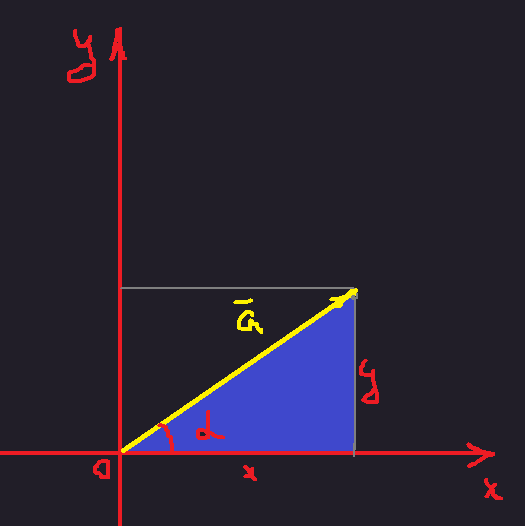

## Example_1

Найдем координаты вектора на плоскости, при данных его модуле и угле по отношению к оси OX:

In [ ]:
mod = 12
angle = 30 # degrees

In [ ]:
x = mod * np.cos(np.radians(angle))
y = mod * np.sin(np.radians(angle))
x, y

(10.392304845413264, 5.999999999999999)

In [ ]:
vec = np.array([x, y])
vec

array([10.39230485,  6.        ])

In [ ]:
plot_vectors(np.array([vec]))

Поскольку вектор представлен двумя координатами, на 3D графике он будет лежать в плоскости XOY.

## Как восстановить координаты трехмерного вектора?
Для этого нам надо знать


*   Модуль
*   Направляющие углы $\alpha$, $\beta$, $\gamma$
    * По отношению к оси OX
    * По отношению к оси OY
    * По отношению к оси OZ

В этом случае расчет координат будет осуществляться:

\begin{cases}
  x_a = |\overrightarrow{a}|\cos{\alpha}      \\
  y_a = |\overrightarrow{a}|\cos{\beta} \\
  z_a = |\overrightarrow{a}|\cos{\gamma}
\end{cases}

Где данные "косинусы" также являются направляющими.

На самом деле, нам на практике необходимо знать только два направляющих угла для трехмерного пространства, а третий мы сможем восстановить по формуле:

$$ \cos^2{\alpha} + \cos^2{\beta} + \cos^2{\gamma} = 1$$

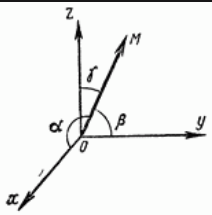



## Example_2

Восстановим координаты  вектора в трехмерном пространстве с заданным модулем и двумя направляющими углами


In [ ]:
mod = 12
alpha = 80
beta = 70

In [ ]:
cos_alpha = np.cos(np.radians(alpha))
cos_beta = np.cos(np.radians(beta))
cos_gamma = (1 - cos_alpha**2 - cos_beta**2)**.5
cos_alpha, cos_beta, cos_gamma

(0.17364817766693041, 0.3420201433256688, 0.9235088153084643)

In [ ]:
x = mod*cos_alpha
y = mod*cos_beta
z = mod*cos_gamma
vec = np.array([x, y, z])
vec

array([ 2.08377813,  4.10424172, 11.08210578])

In [ ]:
plot_vectors(np.array([vec]))

# Task_2

Даны два вектора $a$ и $b$ в виде модуля и угла в градусах по отношению оси OX в плоской системе координат XOY. Восстановите координаты данных векторов и найдите:
* $\overrightarrow{c} = \overrightarrow{a} + \overrightarrow{b}$ в координатах (В виде массива из двух значений)
* $|\overrightarrow{c}|$
* Угол по отношению оси OX для полученного вектора  $\overrightarrow{c}$

In [ ]:
mod_a, mod_b = 12, 4
angle_a, angle_b = 30, 60

# Task_3

Для вектора `vec` восстановите координаты в трехмерной системе отсчета если даны модуль и два направляющих угла в градусах. Провизуализируйте результат.

In [ ]:
mod = 20
alpha = 20
beta = 85

# Task_4

Дана матрица векторов. За вектор будем считать строку матрицы. Найдите вектор-сумму всех векторов. Провизуализируйте результат.


In [ ]:
vectors = np.random.randn(6, 3)*10
vectors

array([[ -1.43136519,  -0.26960176, -20.49617598],
       [  1.92574617,  -0.42508631, -19.53871588],
       [ 12.89848188,  14.61139456,  -7.19312575],
       [  7.81978177,  -7.49921574,  -0.04179398],
       [  8.60575045,   9.07296977,  19.41427876],
       [  6.91804437,   7.42662059,  -5.88064594]])

In [ ]:
res_vec = ...

In [ ]:
plot_vectors(vectors)

# Task_5

Дано векторное выражение:

$$\overrightarrow{c} = 2\overrightarrow{a} + 3\overrightarrow{b}$$

Все вектора даны в координатах. Найдите координаты вектора $\overrightarrow{a}$, если известны остальные.

In [ ]:
b = [1, -4, 2]
c = [3, 2, -1]

# Task_6

Найдите скалярное произведение векторов $<\overrightarrow{a}, \overrightarrow{b}>$

In [ ]:
b = [1, -4, 2]
c = [3, 2, -1]

# Task_7

Для данных векторов вычислите угол между ними.

In [ ]:
a = [1, -4, 2]
b = [3, 2, -1]

# Task_8

Даны координаты вершины треугольника ABC. Расчитайте угол при вершине В.

A(2, 1, 7)

B(-1, 1, 3)

C(-8, 1, 2)

# Task_9**

Решите задачу итеративно (методом перебора).

Найдите целые значения чисел, при которых вектора перпендикулярны (косинус угла между ними равен нулю)

a = [1, m, 3]

b = [3, 6, n]

# Task_10

Охотник бродит по лесу в поисках зверя. Сначала он прошел 5 км на север, затем повернул на запад и прошел еще 4 км. Вдруг он слышит лай собак и устремляется к ним. Он побежал на северо-восток и пробежал 3 км. Найдите координаты охотника в момент, когда он нашел собак.

Мы должны создать координатную сетку в км, где ось OY будет направлена на север а ось OX на восток и начало координат будет соответствовать точке начала движения охотника. Каждый этап перемещения охотника можно представить как отдельный вектор. (Вектор перемещения). Если мы просуммируем данные вектора, то получим вектор, соединяющий начало координат с конечной точкой.

# Task_11

Снаряд летит со скоростью около 800 метров в секунду. Затем снаряд разрывается на две части. Малая часть имеет массу 20% начальной и она устремляется строго вверх со скоростью 1000 метров в секунду.
* Рассчитайте вектор скорости для второй половины.
* Вычислите модуль скорости второй половины
* На сколько градусов отклонился вектор скорости второй половины от вектора начальной скорости.

Начальная скорость дана в векторном представлении.

Для решения задачи нам понадобится закон сохранения импульса в векторной форме. Для данной задачи он примет вид:

$$m\overrightarrow{\upsilon_0} = 0.2m\overrightarrow{\upsilon_1} + 0.8m\overrightarrow{\upsilon_2}$$

Для упрощения, массу можно сократить в уравнении.

In [ ]:
v_0 = [600, 500, 200]